In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Integration

In [272]:
# Load all datasets
transactions = pd.read_csv("transactions_2019data.csv")
fraud_labels = pd.read_json("fraud_labels.json")
card_info = pd.read_csv("cards_data.csv")
users = pd.read_csv("users_data.csv")

In [273]:
# Drop sensitive or unnecessary columns from card_info
card_info = card_info.drop(columns=["card_number", "cvv"], errors="ignore")
#users
users = users.drop(columns=["address", "birth_year", "birth_month"])

In [274]:
# Step 1: Merge transactions with fraud labels using the transaction ID
# This adds the 'fraud' flag column to each transaction record.
df_step1 = transactions.merge(
    fraud_labels,
    left_on="id",
    right_on="transaction_id",
    how="left"
)

In [275]:
# Step 2: Merge the result with card information
# This links each transaction to its corresponding card details.
df_step2 = df_step1.merge(
    card_info,
    left_on="card_id",
    right_on="id",
    how="left",
    suffixes=("", "_card")
)

In [276]:
# Step 3: Merge with users dataset
# This connects transactions to the user who made them.
df_new = df_step2.merge(
    users,
    left_on="client_id",
    right_on="id",
    how="left",
    suffixes=("", "_user")
)

In [277]:
df_new.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,22326462,22326465,22326466,22326467,22326468,22326469,22326470,22326471,22326472,22326473,22326474,22326475,22326476,22326478,22326479
date,2019-01-01 00:02:00,2019-01-01 00:05:00,2019-01-01 00:06:00,2019-01-01 00:06:00,2019-01-01 00:10:00,2019-01-01 00:11:00,2019-01-01 00:11:00,2019-01-01 00:11:00,2019-01-01 00:13:00,2019-01-01 00:14:00,2019-01-01 00:14:00,2019-01-01 00:16:00,2019-01-01 00:18:00,2019-01-01 00:19:00,2019-01-01 00:23:00
client_id,496,1129,114,641,114,316,605,1842,1919,430,1963,487,1684,1053,114
card_id,3186,2677,5283,2774,5283,4125,5061,3743,4302,2860,3364,2024,3278,2900,5283
amount,$119.35,$100.00,$51.71,$105.30,$82.00,$90.15,$3.55,$8.87,$48.12,$140.00,$20.75,$41.39,$31.08,$167.39,$-82.00
use_chip,Chip Transaction,Chip Transaction,Chip Transaction,Swipe Transaction,Chip Transaction,Chip Transaction,Chip Transaction,Chip Transaction,Chip Transaction,Swipe Transaction,Chip Transaction,Chip Transaction,Online Transaction,Online Transaction,Chip Transaction
merchant_id,30286,27092,61195,75781,61195,75781,59935,17726,69972,27092,25759,98359,39021,17976,61195
merchant_city,Mesquite,Vista,North Hollywood,Columbus,North Hollywood,Houston,Brooklyn,Albuquerque,East Hampton,Crown Point,Vacaville,Albany,ONLINE,ONLINE,North Hollywood
merchant_state,TX,CA,CA,OH,CA,TX,NY,NM,NY,IN,CA,NY,NaN,NaN,CA
zip,75149.0,92084.0,91606.0,43228.0,91606.0,77051.0,11210.0,87121.0,11937.0,46307.0,95687.0,12203.0,NaN,NaN,91606.0


In [278]:
df_new.shape

(1159966, 36)

In [279]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159966 entries, 0 to 1159965
Data columns (total 36 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1159966 non-null  int64  
 1   date                   1159966 non-null  object 
 2   client_id              1159966 non-null  int64  
 3   card_id                1159966 non-null  int64  
 4   amount                 1159966 non-null  object 
 5   use_chip               1159966 non-null  object 
 6   merchant_id            1159966 non-null  int64  
 7   merchant_city          1159966 non-null  object 
 8   merchant_state         1018895 non-null  object 
 9   zip                    1009034 non-null  float64
 10  mcc                    1159966 non-null  int64  
 11  errors                 18654 non-null    object 
 12  transaction_id         777339 non-null   float64
 13  fraud                  777339 non-null   object 
 14  id_card           

In [280]:
df_new.isnull().sum()

id                             0
date                           0
client_id                      0
card_id                        0
amount                         0
use_chip                       0
merchant_id                    0
merchant_city                  0
merchant_state            141071
zip                       150932
mcc                            0
errors                   1141312
transaction_id            382627
fraud                     382627
id_card                        0
client_id_card                 0
card_brand                     0
card_type                      0
expires                        0
has_chip                       0
num_cards_issued               0
credit_limit                   0
acct_open_date                 0
year_pin_last_changed          0
card_on_dark_web               0
id_user                        0
current_age                    0
retirement_age                 0
gender                         0
latitude                       0
longitude 

In [281]:
#missing values in percentage 
df_new.isnull().sum()/df_new.shape[0] * 100

id                        0.000000
date                      0.000000
client_id                 0.000000
card_id                   0.000000
amount                    0.000000
use_chip                  0.000000
merchant_id               0.000000
merchant_city             0.000000
merchant_state           12.161650
zip                      13.011761
mcc                       0.000000
errors                   98.391849
transaction_id           32.986053
fraud                    32.986053
id_card                   0.000000
client_id_card            0.000000
card_brand                0.000000
card_type                 0.000000
expires                   0.000000
has_chip                  0.000000
num_cards_issued          0.000000
credit_limit              0.000000
acct_open_date            0.000000
year_pin_last_changed     0.000000
card_on_dark_web          0.000000
id_user                   0.000000
current_age               0.000000
retirement_age            0.000000
gender              

In [282]:
df_new.duplicated().sum()

np.int64(0)

Fixing Integration issues 

In [283]:
#1. Handling schema issues = redudnancy 
df_new = df_new.drop(columns=["client_id_card", "id_user", "id_card", "transaction_id"])

In [284]:
#check if it worked 
df_new.shape

(1159966, 32)

In [285]:
#renaming id to transaction_id for clarity
df_new = df_new.rename(columns={"id": "transaction_id"})

Missing Data

In [286]:
# merchant_state 12%
df_new["merchant_state"] = df_new["merchant_state"].fillna("Unknown")
#zip 13%
df_new["zip"] = df_new["zip"].fillna(-1)

In [287]:
# errors 98% missing, cant help 
df_new.drop(columns=["errors"], inplace=True)

In [288]:
#fraud 
df_new = df_new.dropna(subset=["fraud"])

Change data types

In [289]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777339 entries, 0 to 1159963
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   transaction_id         777339 non-null  int64  
 1   date                   777339 non-null  object 
 2   client_id              777339 non-null  int64  
 3   card_id                777339 non-null  int64  
 4   amount                 777339 non-null  object 
 5   use_chip               777339 non-null  object 
 6   merchant_id            777339 non-null  int64  
 7   merchant_city          777339 non-null  object 
 8   merchant_state         777339 non-null  object 
 9   zip                    777339 non-null  float64
 10  mcc                    777339 non-null  int64  
 11  fraud                  777339 non-null  object 
 12  card_brand             777339 non-null  object 
 13  card_type              777339 non-null  object 
 14  expires                777339 non-null  

In [290]:
# 1. Convert numeric-like objects → numeric
money_cols = [
    "amount",
    "credit_limit",
    "per_capita_income",
    "yearly_income",
    "total_debt"
]

for col in money_cols:
    # Only clean if column exists
    if col in df_new.columns:
        df_new[col] = (
            df_new[col]
            .astype(str)
            .str.replace(r"[\$,]", "", regex=True)
            .astype(float)
        )

print(df_new[money_cols].dtypes)


amount               float64
credit_limit         float64
per_capita_income    float64
yearly_income        float64
total_debt           float64
dtype: object


In [291]:
# 2. Dates → datetime
df_new["date"] = pd.to_datetime(df_new["date"], errors="coerce")
df_new["expires"] = pd.to_datetime(df_new["expires"], errors="coerce")
df_new["acct_open_date"] = pd.to_datetime(df_new["acct_open_date"], errors="coerce")

C:\Users\ruqay\AppData\Local\Temp\ipykernel_14728\70123594.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_new["expires"] = pd.to_datetime(df_new["expires"], errors="coerce")
C:\Users\ruqay\AppData\Local\Temp\ipykernel_14728\70123594.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_new["acct_open_date"] = pd.to_datetime(df_new["acct_open_date"], errors="coerce")


In [292]:

df_new["fraud"] = (
    df_new["fraud"]
        .astype("string")
        .str.strip()
        .str.lower()
        .map({"yes": 1, "no": 0})
        .astype("int64")
)


df_new["has_chip"] = (
    df_new["has_chip"]
        .astype("string")
        .str.strip()
        .str.lower()
        .map({"yes": 1, "no": 0})
        .astype("int64")
)

df_new["card_on_dark_web"] = (
    df_new["card_on_dark_web"]
        .astype("string")
        .str.strip()
        .str.lower()
        .map({"yes": 1, "no": 0})
        .astype("int64")
)

In [293]:
df_new.head(5).T

,0,1,2,3,4
transaction_id,22326462,22326465,22326466,22326467,22326468
date,2019-01-01 00:02:00,2019-01-01 00:05:00,2019-01-01 00:06:00,2019-01-01 00:06:00,2019-01-01 00:10:00
client_id,496,1129,114,641,114
card_id,3186,2677,5283,2774,5283
amount,119.35,100.0,51.71,105.3,82.0
use_chip,Chip Transaction,Chip Transaction,Chip Transaction,Swipe Transaction,Chip Transaction
merchant_id,30286,27092,61195,75781,61195
merchant_city,Mesquite,Vista,North Hollywood,Columbus,North Hollywood
merchant_state,TX,CA,CA,OH,CA
zip,75149.0,92084.0,91606.0,43228.0,91606.0


Outliers

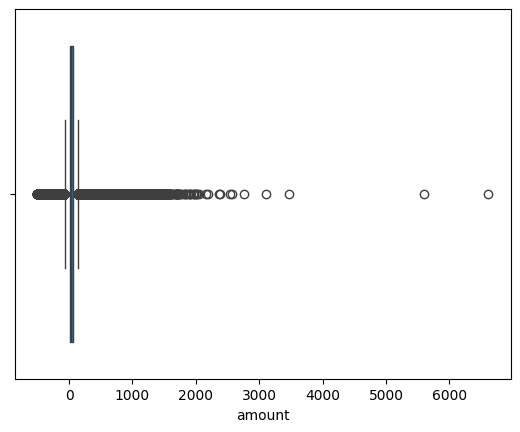

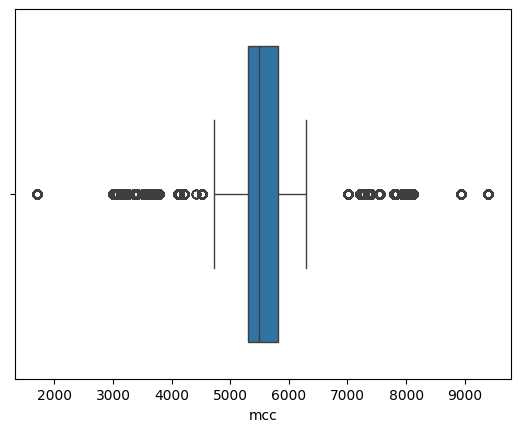

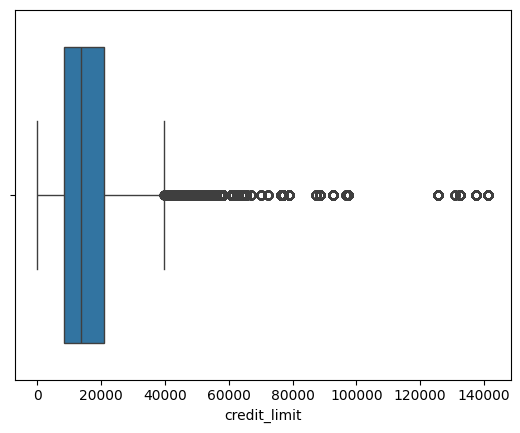

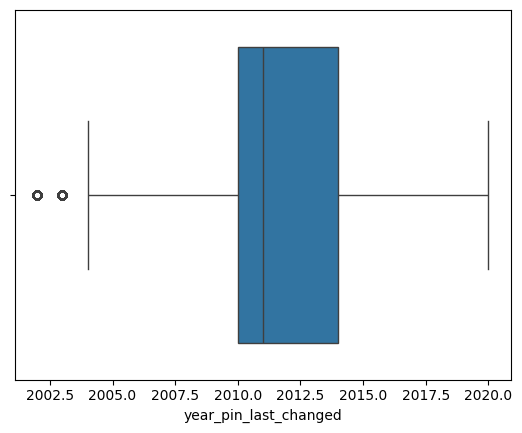

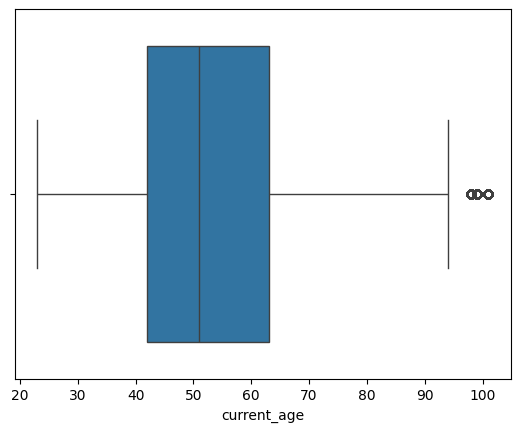

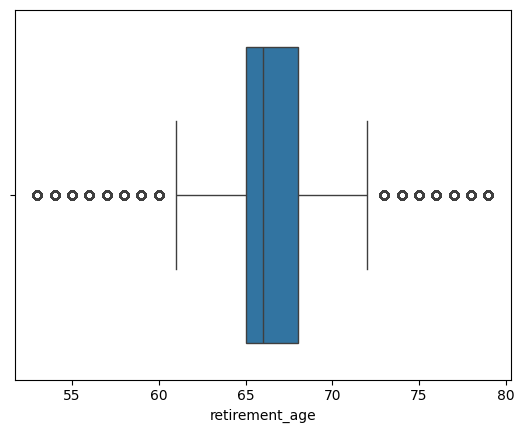

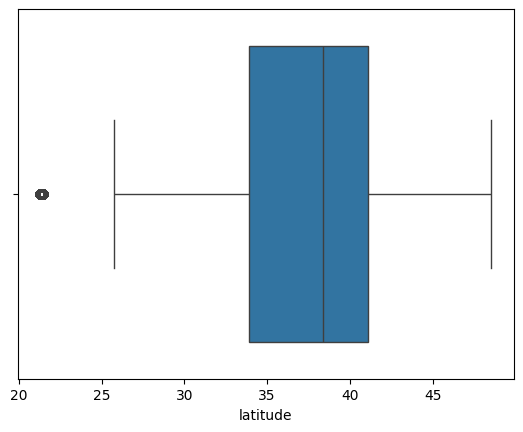

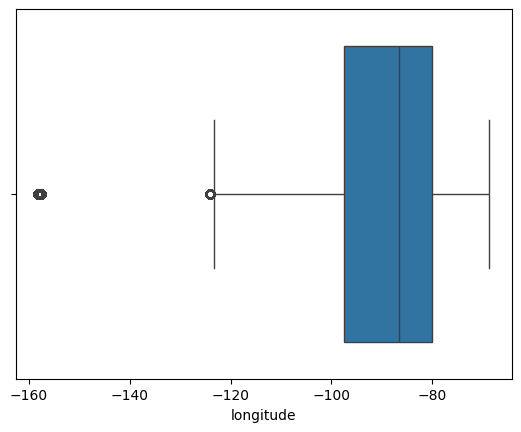

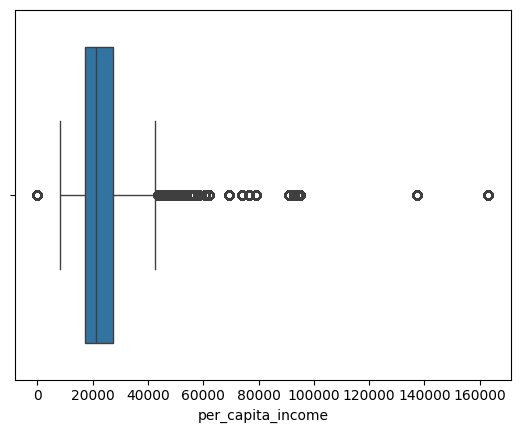

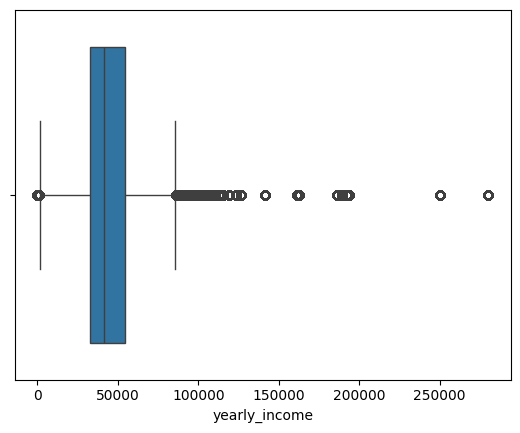

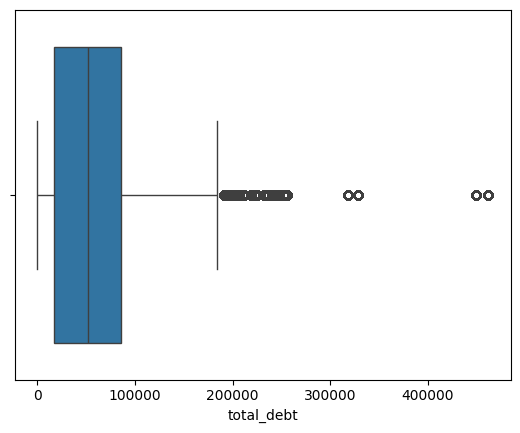

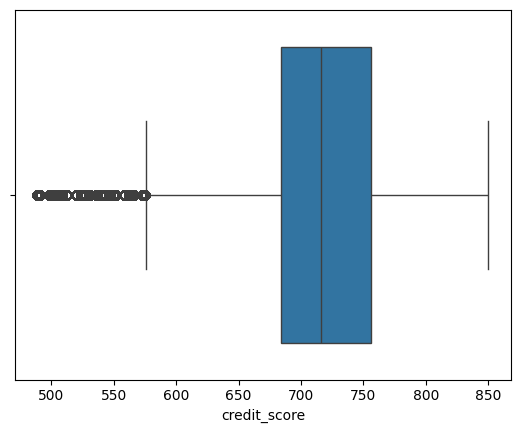

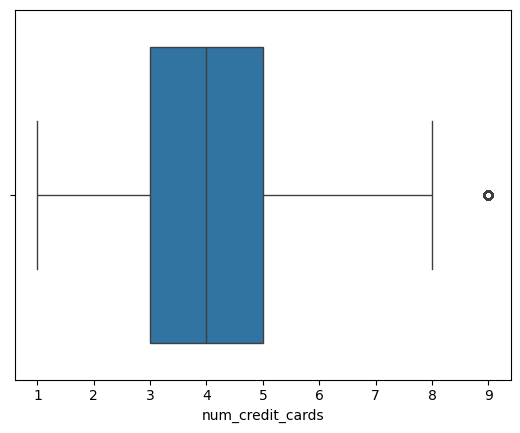

In [294]:
for i in ['amount',  'mcc', 'credit_limit', 'year_pin_last_changed', 'current_age', 'retirement_age', 'latitude', 'longitude', 'per_capita_income', 'yearly_income','total_debt', 'credit_score', 'num_credit_cards']:
    sns.boxplot(data=df_new, x=i)
    plt.show()

In [295]:
import numpy as np

def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw


In [296]:
df_new.columns


Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc', 'fraud',
       'card_brand', 'card_type', 'expires', 'has_chip', 'num_cards_issued',
       'credit_limit', 'acct_open_date', 'year_pin_last_changed',
       'card_on_dark_web', 'current_age', 'retirement_age', 'gender',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')

In [297]:
for i in ['amount',  'mcc', 'credit_limit', 'year_pin_last_changed', 'current_age', 'retirement_age', 'latitude', 'longitude', 'per_capita_income', 'yearly_income','total_debt', 'credit_score', 'num_credit_cards']:
    lw, uw = whisker(df_new[i])
    df_new[i] = np.where(df_new[i] < lw, lw, df_new[i])
    df_new[i] = np.where(df_new[i] > uw, uw, df_new[i])


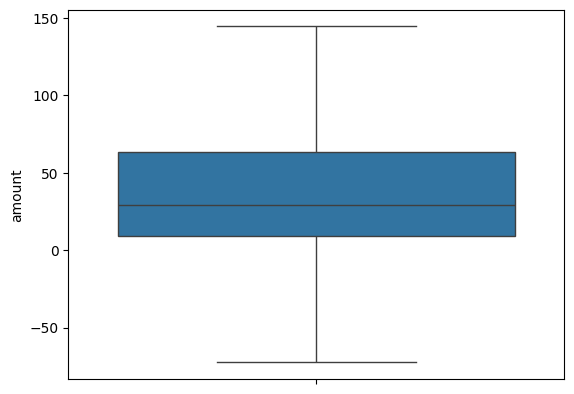

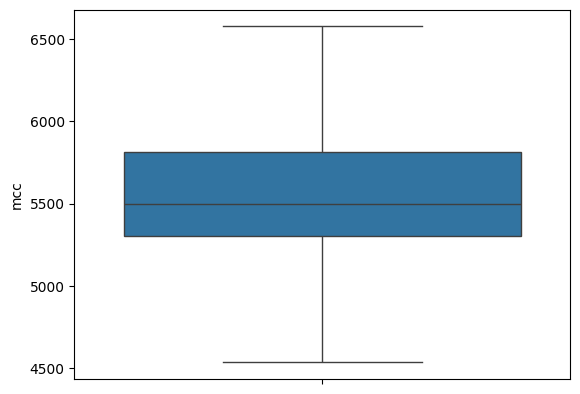

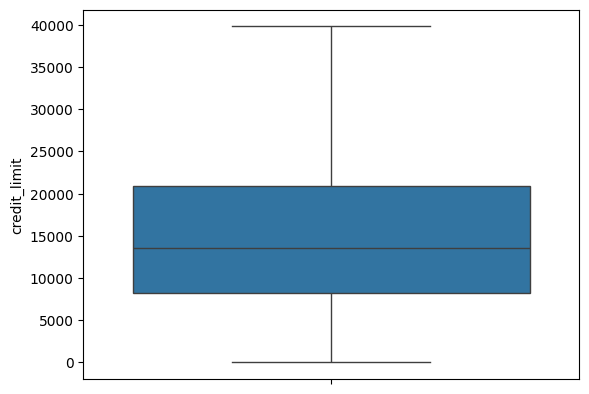

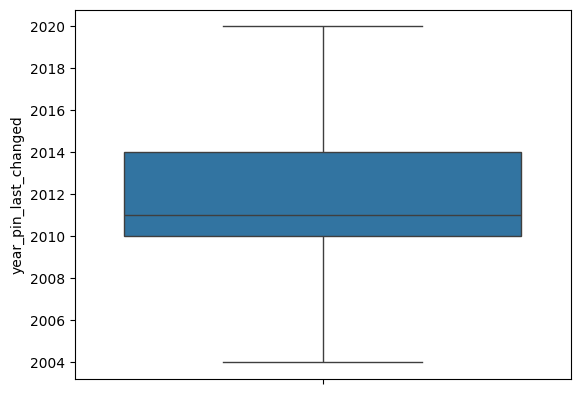

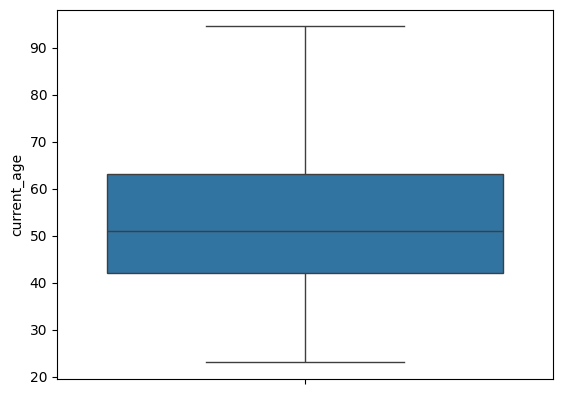

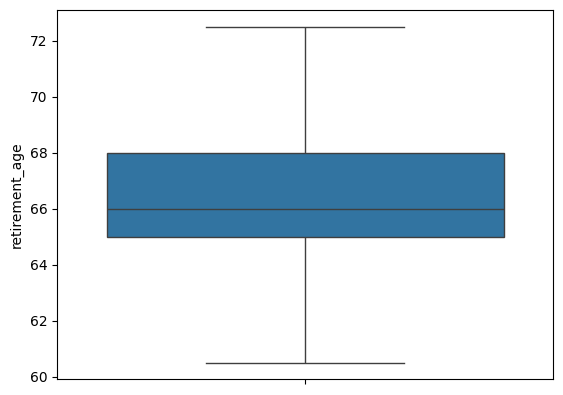

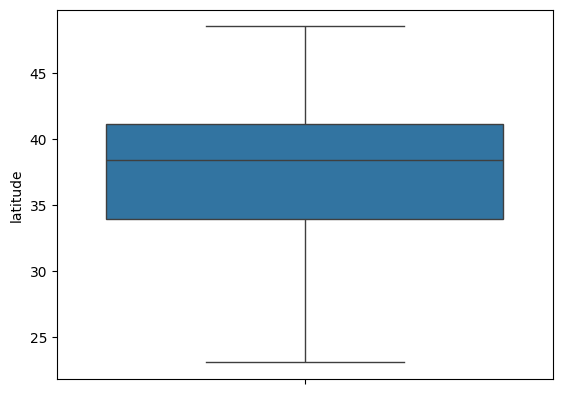

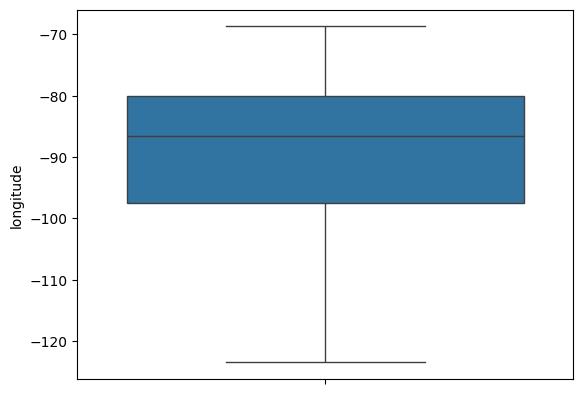

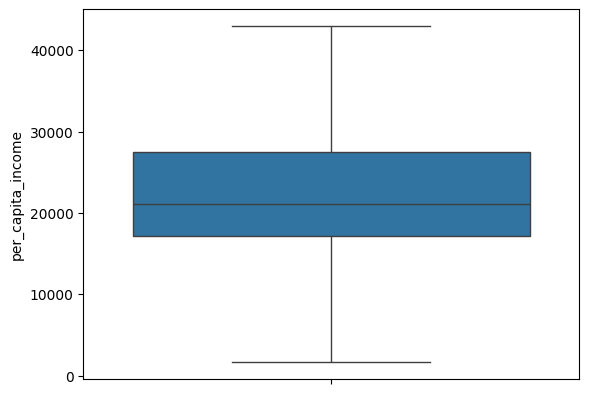

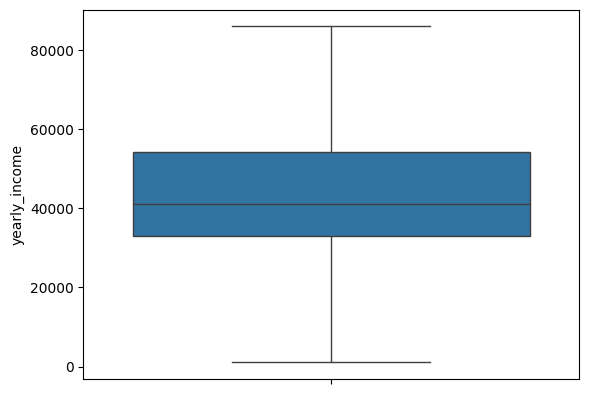

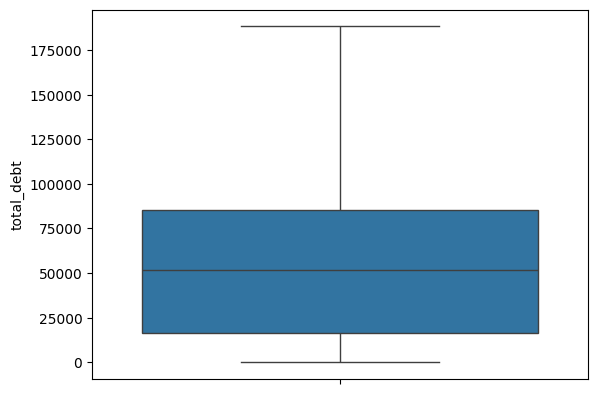

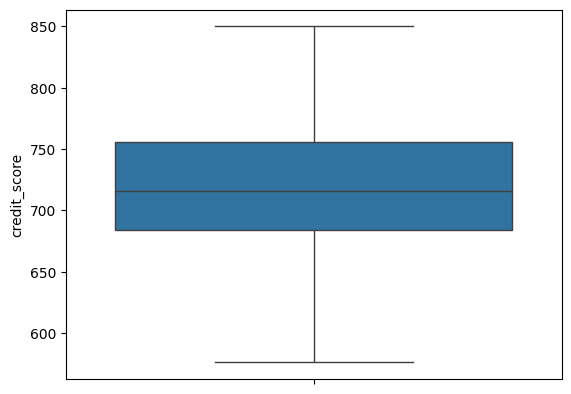

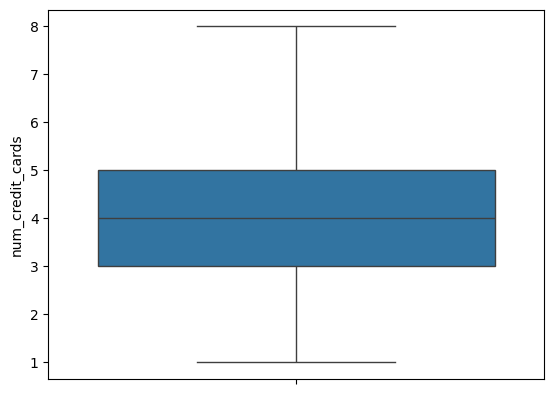

In [298]:
for i in ['amount',  'mcc', 'credit_limit', 'year_pin_last_changed', 'current_age', 'retirement_age', 'latitude', 'longitude', 'per_capita_income', 'yearly_income','total_debt', 'credit_score', 'num_credit_cards']:
    sns.boxplot(df_new[i])
    plt.show()


Normalization, discretization, encoding

In [299]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [300]:
amount_bins = [-1, 25, 75, 150, 300, np.inf]
amount_labels = ["very_low", "low", "medium", "high", "very_high"]

df_new["amount_bin"] = pd.cut(df_new["amount"], bins=amount_bins, labels=amount_labels)

age_bins = [0, 25, 35, 50, np.inf]
age_labels = ["<25", "25-35", "35-50", "50+"]
df_new["age_group"] = pd.cut(df_new["current_age"], bins=age_bins, labels=age_labels)

cs_bins = [0, 580, 670, 740, 800, np.inf]
cs_labels = ["poor", "fair", "good", "very_good", "excellent"]
df_new["credit_band"] = pd.cut(df_new["credit_score"], bins=cs_bins, labels=cs_labels)


In [301]:
df_new["use_chip_flag"] = df_new["use_chip"].map({
    "Chip Transaction": 1,
    "Swipe Transaction": 0
})

df_new["gender_flag"] = df_new["gender"].map({
    "Male": 1,
    "Female": 0
})


In [302]:
df_new = pd.get_dummies(
    df_new,
    columns=["card_brand", "card_type", "amount_bin", "age_group", "credit_band"],
    drop_first=True
)


In [303]:
df_new["use_chip"] = df_new["use_chip"].str.strip()  # clean spaces if any

df_new = pd.get_dummies(df_new, columns=["use_chip"], prefix="use_chip", drop_first=False)


In [304]:
df_new.head(5).T

,0,1,2,3,4
transaction_id,22326462,22326465,22326466,22326467,22326468
date,2019-01-01 00:02:00,2019-01-01 00:05:00,2019-01-01 00:06:00,2019-01-01 00:06:00,2019-01-01 00:10:00
client_id,496,1129,114,641,114
card_id,3186,2677,5283,2774,5283
amount,119.35,100.0,51.71,105.3,82.0
merchant_id,30286,27092,61195,75781,61195
merchant_city,Mesquite,Vista,North Hollywood,Columbus,North Hollywood
merchant_state,TX,CA,CA,OH,CA
zip,75149.0,92084.0,91606.0,43228.0,91606.0
mcc,4814.0,4829.0,5541.0,5411.0,5541.0


In [305]:
# 1. REMOVE ALL ID COLUMNS
df_new = df_new.drop(columns=[
    "transaction_id", "client_id", "card_id", "merchant_id", "merchant_city", "merchant_state", "longitude", "latitude", "zip", "mcc"
])

# 2. REMOVE RAW CATEGORICAL COLUMNS (since you have encoded versions)
df_new = df_new.drop(columns=[
    "card_brand", "card_type", "use_chip", "gender",
    "amount_bin", "age_group", "credit_band"
], errors='ignore')

# 3. HANDLE DATE COLUMN
df_new["hour"] = df_new["date"].dt.hour
df_new["day"] = df_new["date"].dt.dayofweek
df_new["month"] = df_new["date"].dt.month

df_new = df_new.drop(columns=["date"])

# 4. CONFIRM NO OBJECT TYPE COLUMNS REMAIN
print(df_new.dtypes)

# 5. TRAIN/TEST SPLIT
X = df_new.drop(columns=["fraud"])
y = df_new["fraud"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


amount                                float64
fraud                                   int64
expires                        datetime64[ns]
has_chip                                int64
num_cards_issued                        int64
credit_limit                          float64
acct_open_date                 datetime64[ns]
year_pin_last_changed                 float64
card_on_dark_web                        int64
current_age                           float64
retirement_age                        float64
per_capita_income                     float64
yearly_income                         float64
total_debt                            float64
credit_score                          float64
num_credit_cards                      float64
use_chip_flag                         float64
gender_flag                             int64
card_brand_Discover                      bool
card_brand_Mastercard                    bool
card_brand_Visa                          bool
card_type_Debit                   

In [306]:
# Make sure fraud is numeric
df_new["fraud"] = df_new["fraud"].astype(int)

# Keep ONLY numeric + bool columns for modeling
num_cols = df_new.select_dtypes(include=["number", "bool"]).columns

# X = all numeric features except target
X = df_new[num_cols].drop(columns=["fraud"])
y = df_new["fraud"]


In [307]:
df_new.to_csv("cleaned_data1.csv", index=False)

In [308]:
df_model = df_new.dropna()
num_cols = df_model.select_dtypes(include=["number", "bool"]).columns
X = df_model[num_cols].drop(columns=["fraud"])
y = df_model["fraud"]


In [309]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # keep class ratio the same
)


In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Logistic Regression
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ))
])

# Decision Tree
tree = DecisionTreeClassifier(
    class_weight="balanced",
    min_samples_leaf=50,
    random_state=42
)

# 🔥 THIS MUST RUN BEFORE CV OR TESTING
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": tree
}


In [311]:
from sklearn.model_selection import StratifiedKFold, cross_validate

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

cv_results = {}

for name, model in models.items():   # ← now 'models' exists
    print(f"\n===== {name} — 5-Fold CV =====")
    scores = cross_validate(
        model, X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )
    cv_results[name] = scores

    for metric in scoring:
        print(f"{metric:10s}: {scores[f'test_{metric}'].mean():.4f}")



===== Logistic Regression — 5-Fold CV =====
accuracy  : 0.6476
precision : 0.0039
recall    : 0.6993
f1        : 0.0078
roc_auc   : 0.7328

===== Decision Tree — 5-Fold CV =====
accuracy  : 0.9699
precision : 0.0401
recall    : 0.6154
f1        : 0.0753
roc_auc   : 0.7960


Shape after dropping NaNs: (683537, 40)

Class balance in cleaned data:
fraud
0    0.99801
1    0.00199
Name: proportion, dtype: float64

Train shape: (546829, 37)  Test shape: (136708, 37)

===== Logistic Regression — 5-Fold Cross Validation =====
accuracy  : 0.6476
precision : 0.0039
recall    : 0.6993
f1        : 0.0078
roc_auc   : 0.7328

===== Decision Tree — 5-Fold Cross Validation =====
accuracy  : 0.9699
precision : 0.0401
recall    : 0.6154
f1        : 0.0753
roc_auc   : 0.7960

===== Random Forest — 5-Fold Cross Validation =====
accuracy  : 0.9981
precision : 0.7010
recall    : 0.0949
f1        : 0.1668
roc_auc   : 0.9764


===== FINAL TEST EVALUATION: Logistic Regression =====

Classification Report:
              precision    recall  f1-score   support

   Not Fraud     0.9990    0.6488    0.7867    136436
       Fraud     0.0039    0.6875    0.0077       272

    accuracy                         0.6488    136708
   macro avg     0.5015    0.6681    0.3972    136708
weighte

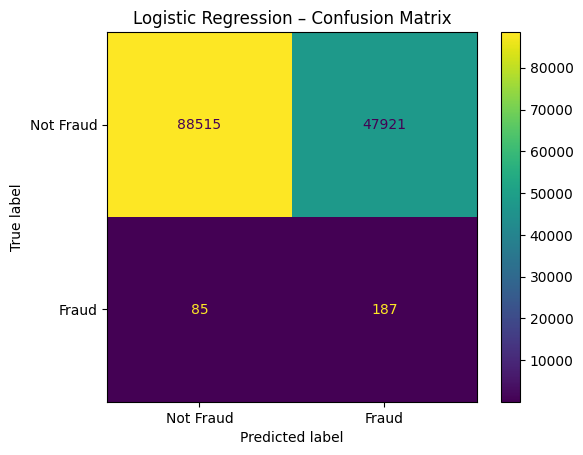



===== FINAL TEST EVALUATION: Decision Tree =====

Classification Report:
              precision    recall  f1-score   support

   Not Fraud     0.9991    0.9710    0.9848    136436
       Fraud     0.0360    0.5441    0.0676       272

    accuracy                         0.9701    136708
   macro avg     0.5176    0.7576    0.5262    136708
weighted avg     0.9971    0.9701    0.9830    136708

Confusion Matrix:
 [[132477   3959]
 [   124    148]]


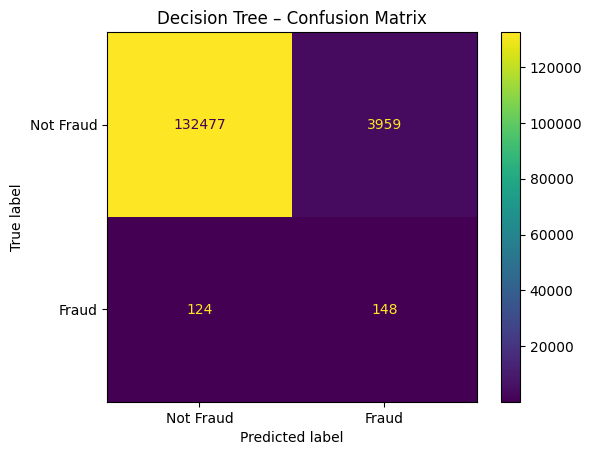



===== FINAL TEST EVALUATION: Random Forest =====

Classification Report:
              precision    recall  f1-score   support

   Not Fraud     0.9983    0.9999    0.9991    136436
       Fraud     0.6875    0.1213    0.2062       272

    accuracy                         0.9981    136708
   macro avg     0.8429    0.5606    0.6027    136708
weighted avg     0.9976    0.9981    0.9975    136708

Confusion Matrix:
 [[136421     15]
 [   239     33]]


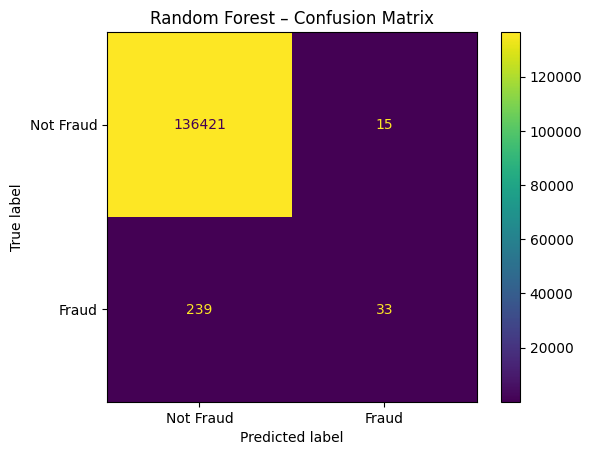

In [312]:
# ============================================================
# 0. IMPORTS
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# ============================================================
# 1. PREPARE DATA
#    - make sure fraud is int
#    - drop rows with NaNs
#    - keep only numeric + bool columns
# ============================================================

# 1.1 Ensure target is numeric
df_new["fraud"] = df_new["fraud"].astype(int)

# 1.2 Drop rows with any missing values (simple + safe)
df_model = df_new.dropna().copy()

# 1.3 Keep only numeric + bool columns for modeling
num_cols = df_model.select_dtypes(include=["number", "bool"]).columns

# Features (X) and target (y)
X = df_model[num_cols].drop(columns=["fraud"])
y = df_model["fraud"]

print("Shape after dropping NaNs:", df_model.shape)
print("\nClass balance in cleaned data:")
print(y.value_counts(normalize=True))


# ============================================================
# 2. TRAIN / TEST SPLIT
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTrain shape:", X_train.shape, " Test shape:", X_test.shape)


# ============================================================
# 3. DEFINE MODELS (3 techniques)
#    - Logistic Regression  (linear model)
#    - Decision Tree        (tree-based)
#    - Random Forest        (ensemble of trees)
# ============================================================

# Logistic Regression with scaling
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",   # handle imbalance
        random_state=42
    ))
])

# Decision Tree
tree = DecisionTreeClassifier(
    class_weight="balanced",
    min_samples_leaf=50,
    random_state=42
)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1
)

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": tree,
    "Random Forest": rf
}


# ============================================================
# 4. CROSS-VALIDATION (5-fold) FOR EACH MODEL
#    Metrics: accuracy, precision, recall, f1, roc_auc
# ============================================================

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

cv_results = {}

for name, model in models.items():
    print(f"\n===== {name} — 5-Fold Cross Validation =====")
    
    scores = cross_validate(
        model, X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )
    cv_results[name] = scores
    
    for metric in scoring:
        mean_ = scores[f"test_{metric}"].mean()
        print(f"{metric:10s}: {mean_:.4f}")


# ============================================================
# 5. REGULAR TRAINING + TEST EVALUATION
#    - Fit each model on train set
#    - Predict on test set
#    - Show confusion matrix + classification report
# ============================================================

for name, model in models.items():
    print(f"\n\n===== FINAL TEST EVALUATION: {name} =====")
    
    # 5.1 Train on training data
    model.fit(X_train, y_train)
    
    # 5.2 Predict on test data
    y_pred = model.predict(X_test)
    
    # 5.3 Classification report (precision, recall, f1)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4, target_names=["Not Fraud", "Fraud"]))
    
    # 5.4 Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["Not Fraud", "Fraud"]
    )
    disp.plot(values_format="d")
    plt.title(f"{name} – Confusion Matrix")
    plt.show()
